## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

### Описание данных

Данные для работы находятся в нескольких таблицах.

`market_file.csv`

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

`market_money.csv`

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.

`market_time.csv`

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

`money.csv`

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

### Цель исследования

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### Ход исследования

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют `диаграммой Исикавы`.
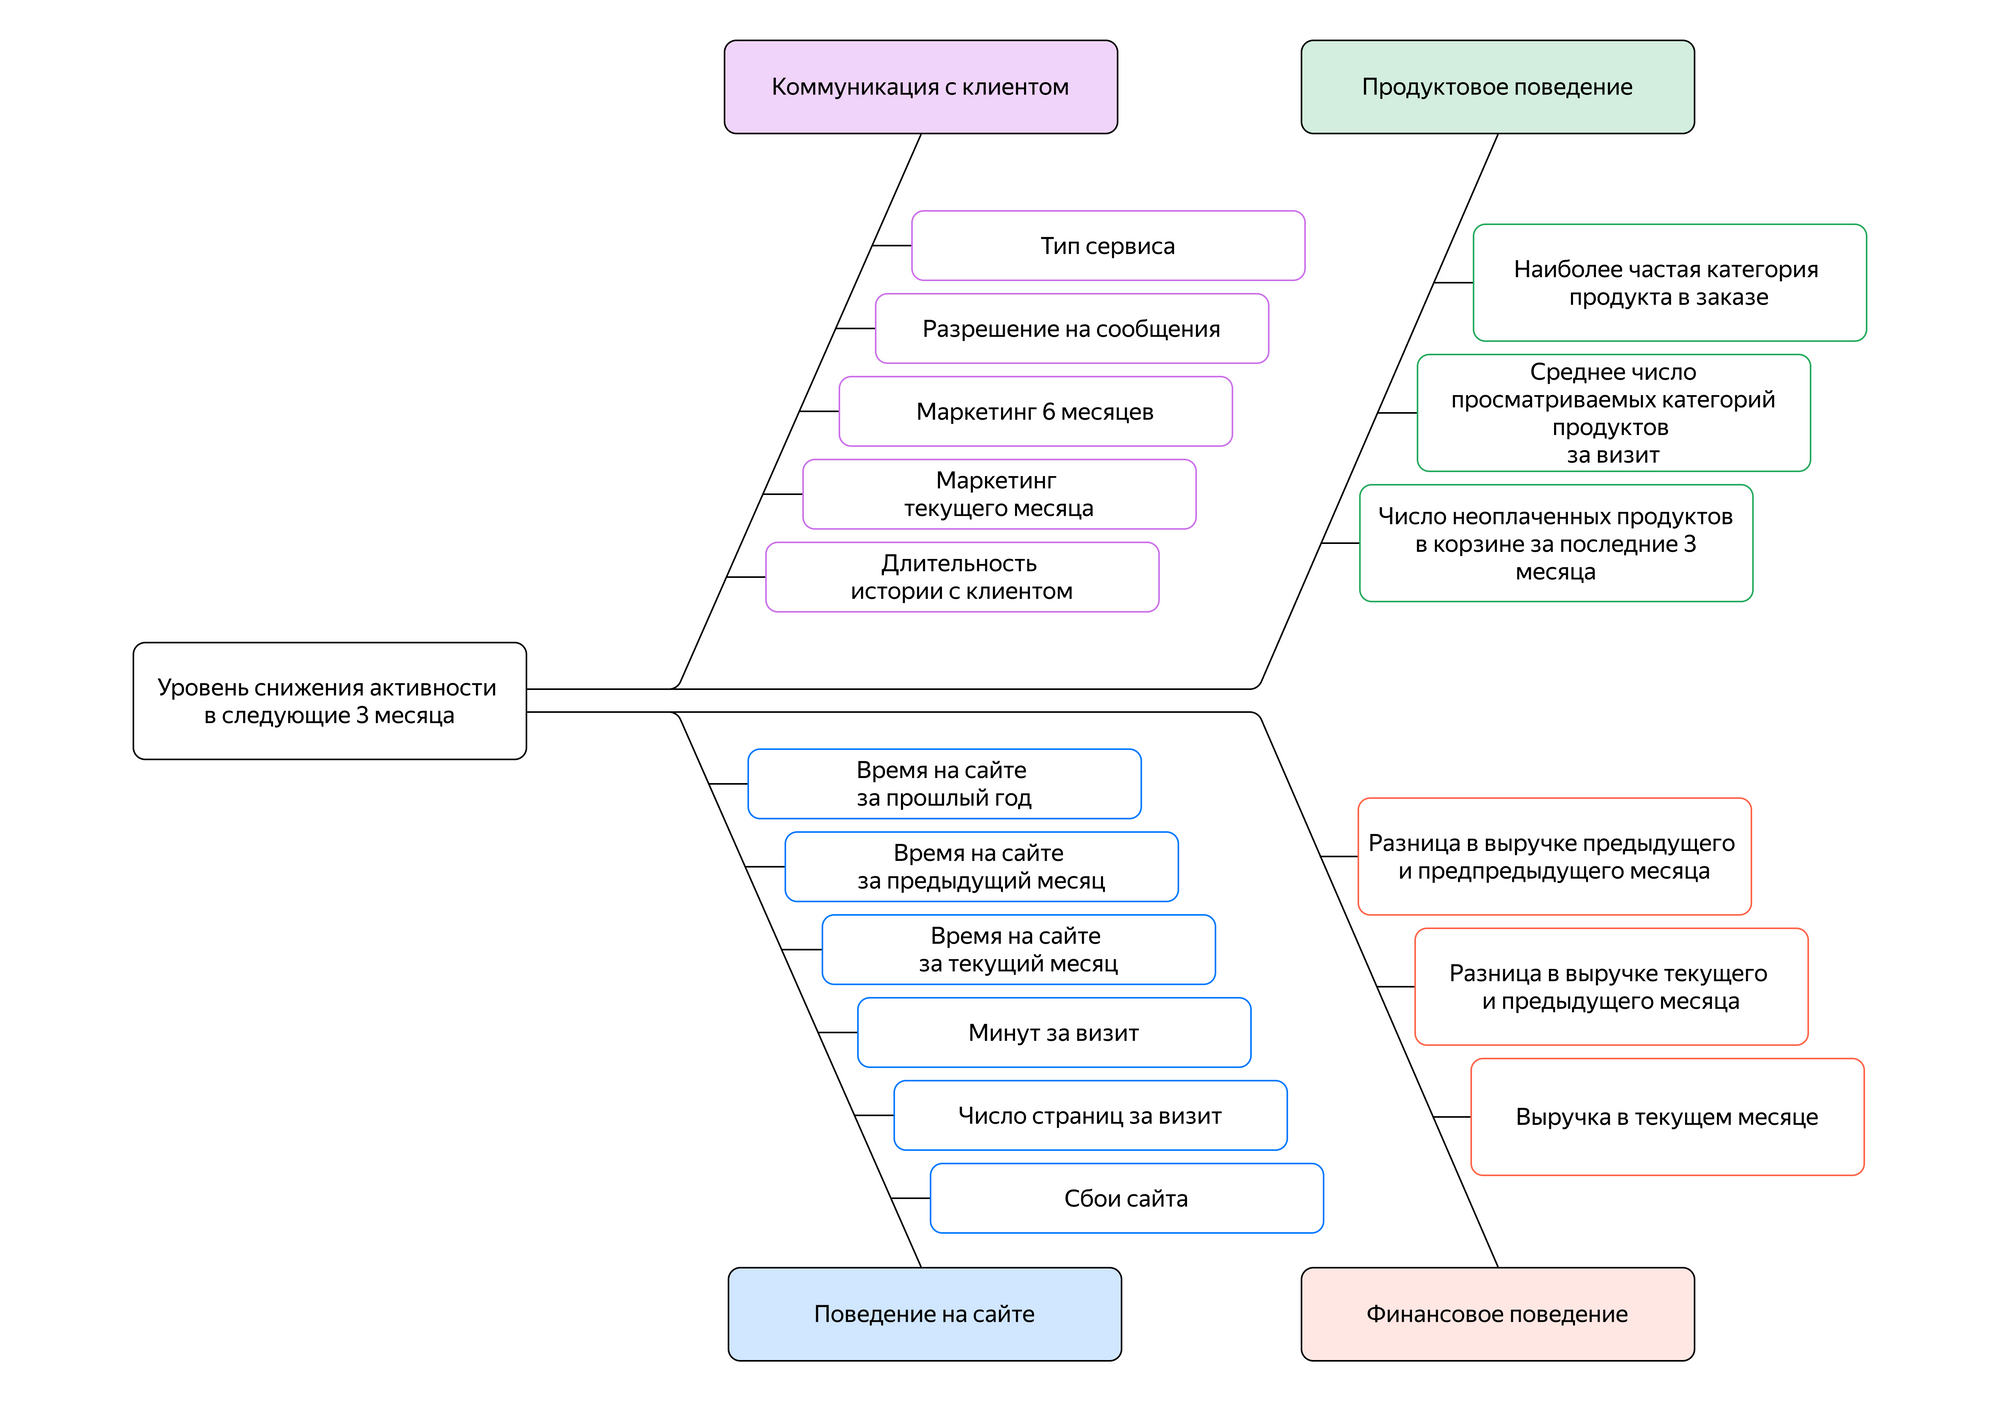
1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
#import shap

In [38]:
# функция для вывода первичной информации о датафреймах
def info_df(name_df):
    print(name_df.info())
    return name_df.describe()

## Загрузка и изучение данных

### Загрузка данных

In [39]:
market_file = pd.read_csv('/datasets/market_file.csv', decimal=',')
market_money = pd.read_csv('/datasets/market_money.csv', decimal=',')
market_time = pd.read_csv('/datasets/market_time.csv', decimal=',')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

### Изучение данных

In [40]:
market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5


In [41]:
info_df(market_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

,id,Маркет_актив_тек_мес,Длительность,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.011538,601.898462,3.27000,2.840000,4.185385,8.176923
std,375.421985,0.696868,249.856289,1.35535,1.971451,1.955298,3.978126
min,215348.000000,3.000000,110.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,4.000000,405.500000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.000000,606.000000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.000000,806.000000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,5.000000,1079.000000,6.00000,10.000000,9.000000,20.000000


 В датасете `market_file.csv` пропущенных значений не наблюдается, столбцам `Маркет_актив_6_мес` и `Акционные_покупки` присвоен не тот тип, нужно поменять его на `float`, и узнать почему изначально он не такой. Метод discribe не вызвал вопросов, взглянем туда после обработки не верных столбцов.

In [42]:
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [43]:
info_df(market_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB
None


,id
count,3900.000000
mean,215997.500000
std,375.325686
min,215348.000000
25%,215672.750000
50%,215997.500000
75%,216322.250000
max,216647.000000


 В датасете `market_money.csv` пропущенных значений не наблюдается, столбцу `Выручка` присвоен не тот тип, нужно поменять его на `float`, и узнать почему изначально он не такой. Метод discribe пока бесполезен, взглянем туда после обработки не верных столбцов.

In [44]:
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [45]:
info_df(market_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


В датасете `market_time` проблем не наблюдается.

In [46]:
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


In [47]:
info_df(money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


В датасете `money` проблем нет, нужно уточнить в чем измеряется прибыль, иначе значение слишком маленькие.

**Выводы**

После загрузки данных видим следующую какртину:
-  В датасете `market_file.csv` пропущенных значений не наблюдается, столбцам `Маркет_актив_6_мес` и `Акционные_покупки` присвоен не тот тип, нужно поменять его на `float`, и узнать почему изначально он не такой. Метод discribe не вызвал вопросов, взглянем туда после обработки не верных столбцов.
-  В датасете `market_money.csv` пропущенных значений не наблюдается, столбцу `Выручка` присвоен не тот тип, нужно поменять его на `float`, и узнать почему изначально он не такой. Метод discribe пока бесполезен, взглянем туда после обработки не верных столбцов.
- В датасете `market_time` проблем не наблюдается.
- В датасете `money` проблем нет, нужно уточнить в чем измеряется прибыль, иначе значение слишком маленькие.

В общем нулевых значений нет, небольшие проблемы с типами данных, все это пофиксим, а так же возможны дубликаты, с ними тоже разберемся. Стоит так же переименовать столбцы, привести их к змеиному регистру. Можно приступать к предобработке.

## Предобработка данных

### Переименование столбцов

Для удобства работы с таблицами следует переименовать столбцы даатфреймов с учетом змеиного регистра.

Для датафрейма `market_file.csv`

- `Покупательская активность` — `покупательская_активность`
- `Тип сервиса` — `тип_сервиса`
- `Разрешить сообщать` — `разрешить_сообщать`

А так же привести все значение к строчному типу

In [48]:
# Создадим функцию которая будет приводить названия столбцов к змеиному регистру
def rename_columns_df(df):
    columns_now_df = df.columns.to_list()
    columns_after_df = []
    for i in range(len(columns_now_df)):    
        columns_after_df.append(
            columns_now_df[i]
            .lower()
            .replace(' ', '_')
        )
    # for i in range(len(columns_after_df)):
    df.columns = columns_after_df
    return df.head()

In [49]:
rename_columns_df(market_file)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [50]:
rename_columns_df(market_money)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [51]:
rename_columns_df(market_time)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [52]:
rename_columns_df(money)

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Столбцы переименованны корректно, можно приступать к изменению типов данных

### Изменение типов данных

Для начала стоит проверить уникальные значения в столбцах с несоответствующими типами данных

In [53]:
market_file['маркет_актив_6_мес'].unique()

array(['3.4', '4.4', '4.9', '3.2', '5.1', '3.3', '4.7', '4.2', '3.9',
       '4.6', '4.3', '3.8', '2.7', '4.8', '2.9', '3.0', '2.4', '1.7',
       '3.6', '4.0', '1.5', '3.5', '4.1', '3.1', '1.4', '0.9', '5.6',
       '2.6', '5.5', '5.2', '5.8', '5.0', '5.4', '5.7', '5.3', '3.7',
       '6.3', '6.6', '4.5', '6.1', '5.9'], dtype=object)

In [54]:
market_file['акционные_покупки'].unique()

array(['0.0', '0.75', '0.14', '0.99', '0.94', '0.26', '0.23', '0.17',
       '0.13', '0.35', '0.74', '0.29', '0.98', '0.95', '0.22', '0.4',
       '0.24', '0.21', '0.39', '0.9', '0.89', '0.27', '0.33', '0.34',
       '0.32', '0.93', '0.3', '0.28', '0.31', '0.25', '0.36', '0.16',
       '0.11', '0.2', '0.18', '0.15', '0.6', '0.12', '0.19', '0.44',
       '0.47', '0.91'], dtype=object)

In [55]:
market_file['маркет_актив_6_мес'] = pd.to_numeric(market_file['маркет_актив_6_мес'], errors='ignore')
market_file['акционные_покупки'] = pd.to_numeric(market_file['акционные_покупки'], errors='ignore')

In [56]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [57]:
market_money['выручка'] = pd.to_numeric(market_money['выручка'], errors='ignore')
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Типы данных поправили, приступим к обработки дубликатов

### Обработка дубликатов

Стоит посмотреть на уникальные значения в столбцах, так как как в даатфрейме `market_file` в столбце `тип_сервиса` имеются значения `стандартт`, с двумя тт на конце, может что еще обнаружим

In [58]:
def unique_df(df):
    list_columns = df.columns.to_list()
    for i in range(len(list_columns)):
        if df[list_columns[i]].dtype == object:
            print(f'{list_columns[i]}: {df[list_columns[i]].unique()}')

In [59]:
unique_df(market_file)

покупательская_активность: ['Снизилась' 'Прежний уровень']
тип_сервиса: ['премиум' 'стандартт' 'стандарт']
разрешить_сообщать: ['да' 'нет']
популярная_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Можем заметить что в столбце `тип_сервиса` есть значение `стандарт` и `стандартт`, надо их привести к общему.

In [60]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace('стандартт', 'стандарт')

In [61]:
unique_df(market_file)

покупательская_активность: ['Снизилась' 'Прежний уровень']
тип_сервиса: ['премиум' 'стандарт']
разрешить_сообщать: ['да' 'нет']
популярная_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [62]:
unique_df(market_money)

период: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [63]:
unique_df(market_time)

период: ['текущий_месяц' 'предыдцщий_месяц']


В датасете `market_time` неверно написано предыдущий, исправим это

In [64]:
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

In [65]:
unique_df(market_time)

период: ['текущий_месяц' 'предыдущий_месяц']


In [66]:
display(
    market_file.duplicated().sum(),
    market_money.duplicated().sum(),
    market_time.duplicated().sum(),
    money.duplicated().sum()
)

0

0

0

0

Дубликатов не обнаружено, можно приступать к исследовательскому анализу

**Выводы**

Была создана функция для переименования столбцов, и применена ко всем датафреймам. Исправлены типы данных некоторых столбцов. Так же устрнены ошибки в названиях значений столбцов, и выполнена проверка на дубликаты, дубликатов не обнаружено.

## Исследовательсикй анализ данных

In [67]:
# создадим функцию для создания гистограмм распределения
def ht_func_col(name_df, list_colmun):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))

    for i, col in enumerate(list_colmun):    
        sns.histplot(x=name_df[col], ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f'Диаграмма размахов по {col}')

    plt.tight_layout()
    plt.show()

In [68]:
# создадим функцию для создания ящиков с усами
def bp_func_col(name_df, list_colmun):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))

    for i, col in enumerate(list_colmun):    
        sns.boxplot(y=name_df[col], ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f'Диаграмма размахов по {col}')

    plt.tight_layout()
    plt.show()
    return name_df.describe()

In [69]:
# создадим функцию для создания круговых диаграмм
def pie_func_col(name_df, list_colmun):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    for i, col in enumerate(list_colmun):
        name_df[col].value_counts().plot(
            y=name_df[col].value_counts(),
            ax=axes[i//2, i%2],
            kind = 'pie',
            autopct = '%1.0f%%'
        )
        axes[i//2, i%2].set_title(f'Диаграмма размахов по {col}')

    plt.tight_layout()
    plt.show()

### Исследовательский анализ датасета `market_file`

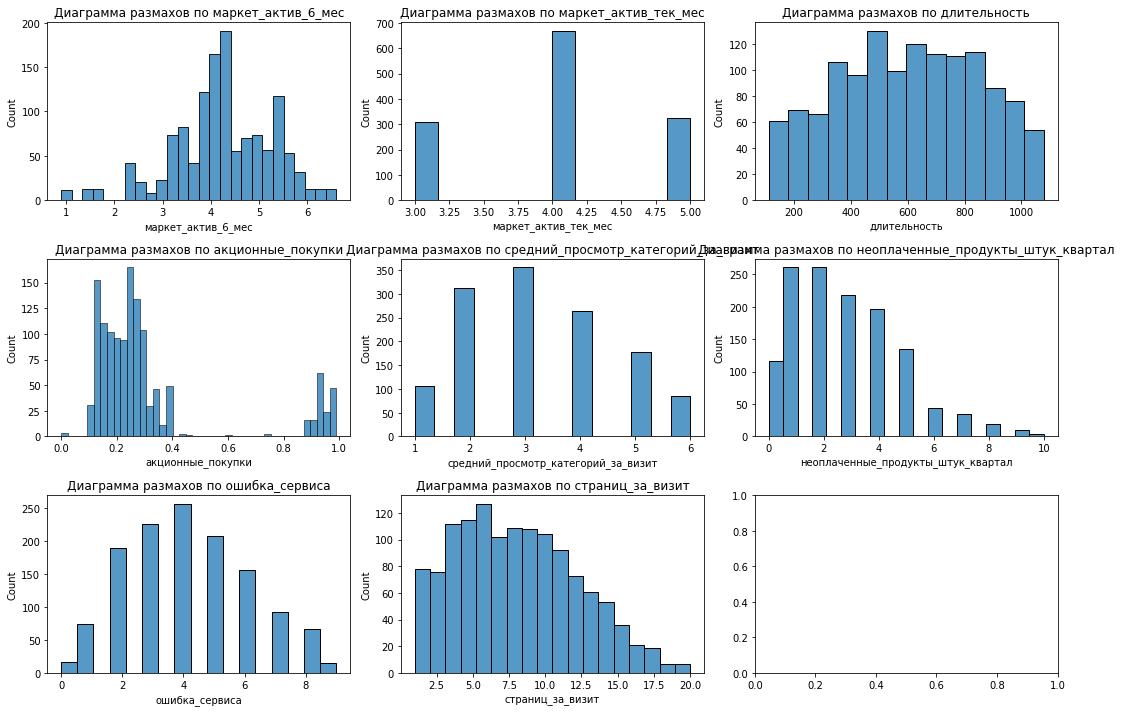

In [70]:
ht_func_col(market_file, ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит'])

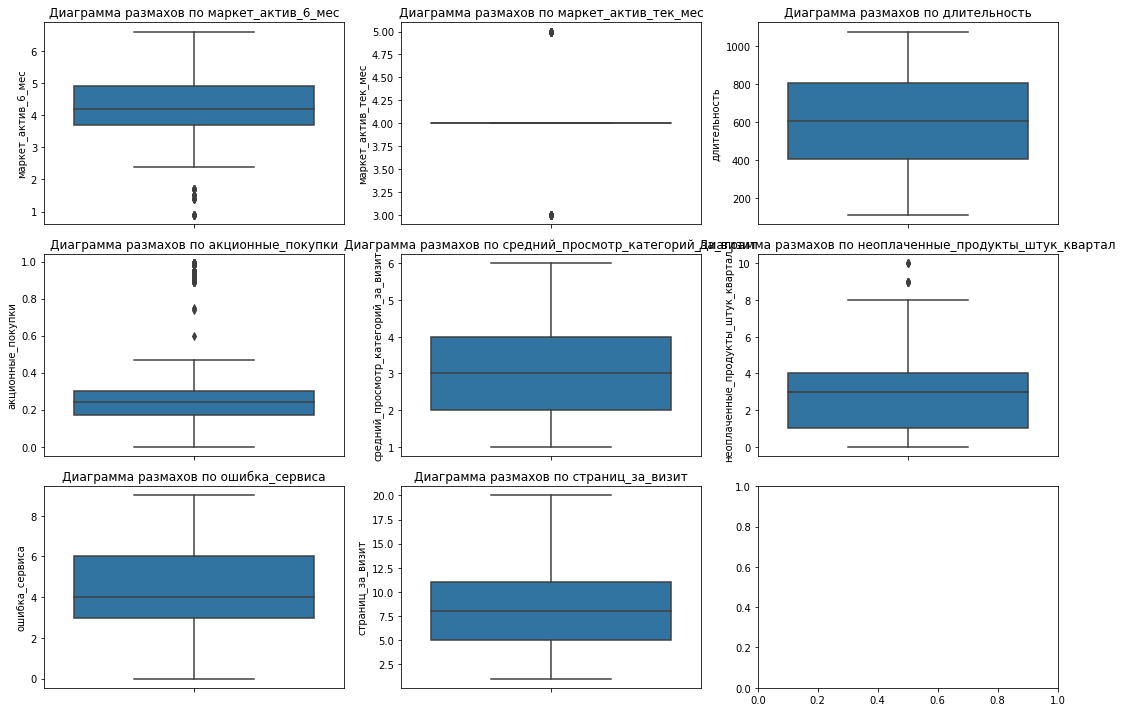

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [71]:
bp_func_col(market_file, ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит'])

Оценив гистограммы и ящики с усами количественных признаков, можем сказать следующее:

- В основном с данными все в порадяке
- Есть небольшое количество выбросов в некоторых столбцах, нужно будет посмотреть на их влияние при создании МО, и очистить если оно слишком сильное
- маркет_актив_тек_мес имеет всего 3 значения

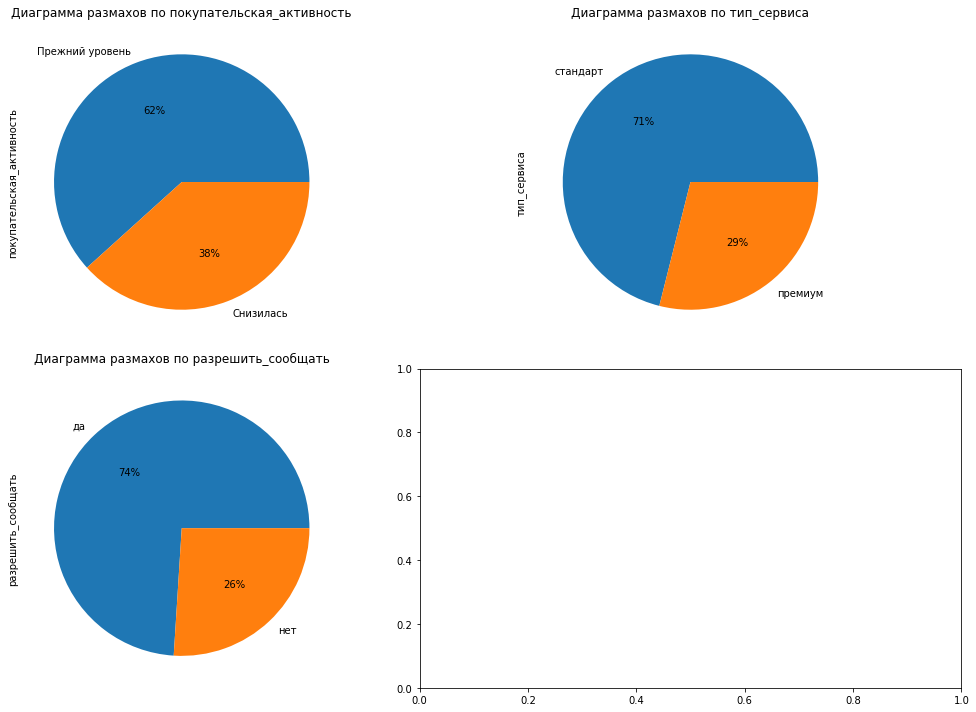

In [72]:
pie_func_col(market_file, ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать'])

<AxesSubplot:title={'center':'Распределение популярных категорий'}>

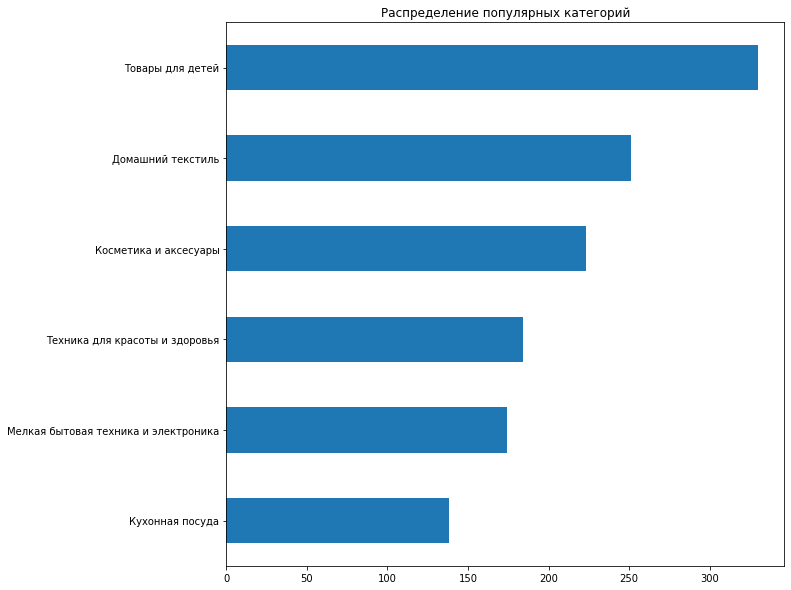

In [73]:
market_file['популярная_категория'].value_counts(ascending=True).plot(
    title = 'Распределение популярных категорий',
    kind = 'barh', 
    figsize = (10,10)
    )

Проанализировав категориальные признаки с помощью круговых диаграмм и barplot, можем оценить, какие категории преобладают в том или ином столбце.

### Исследовательский анализ датасета `market_money`

In [74]:
info_df(market_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [75]:
market_money[market_money['выручка'] > 8000].count()

id         1
период     1
выручка    1
dtype: int64

In [76]:
market_money[market_money['выручка'] > 8000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [77]:
market_money[market_money['выручка'] == 0]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [78]:
market_money = market_money[(market_money['выручка'] < 8000) & (market_money['выручка'] > 0)]

Можем заметить что в данных явно имеется 6 выборсов, со значением 0 и 106862.2, так как их мало, можем их удалить

In [79]:
market_money.describe()

,id,выручка
count,3893.000000,3893.000000
mean,215998.649371,5007.282918
std,374.681667,679.724898
min,215348.000000,2758.700000
25%,215674.000000,4592.000000
50%,215999.000000,4959.000000
75%,216323.000000,5363.000000
max,216647.000000,7799.400000


<AxesSubplot:title={'center':'Распределение периодов'}>

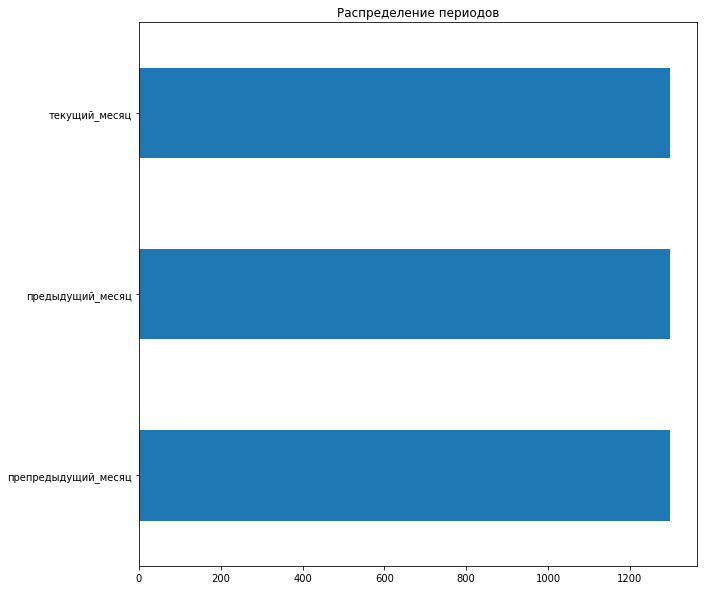

In [80]:
market_money['период'].value_counts(ascending=True).plot(
    title = 'Распределение периодов',
    kind = 'barh', 
    figsize = (10,10)
)

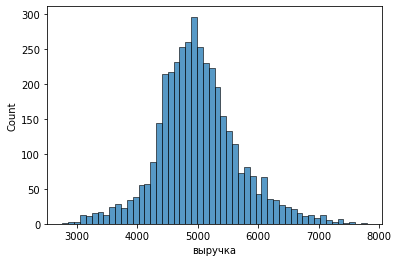

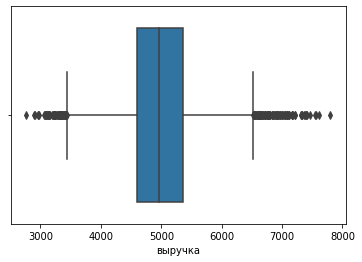

In [81]:
sns.histplot(x=market_money['выручка'])
plt.show()
sns.boxplot(x=market_money['выручка'])
plt.show()

Теперь с данными все впорядке, хоть и множество знаечний лежит переде и за, первым и третьим квантилями, соотвественно.

### Исследовательский анализ датасета `market_time`

In [82]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


<AxesSubplot:title={'center':'Распределение периодов'}>

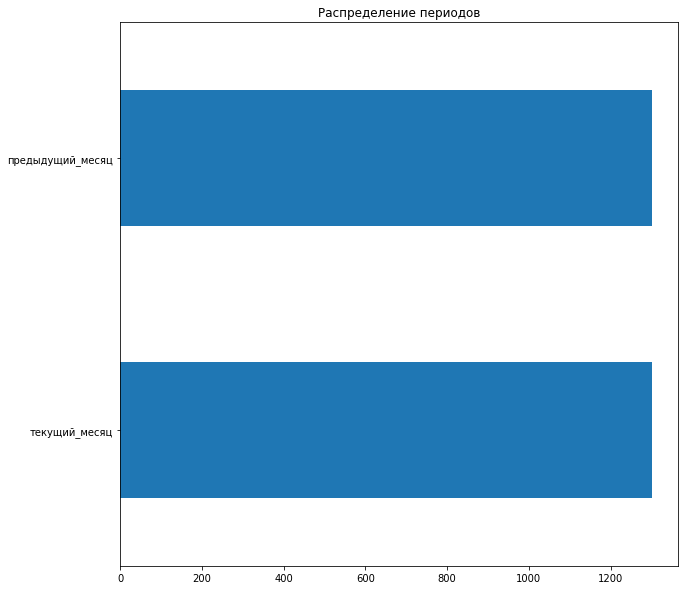

In [83]:
market_time['период'].value_counts(ascending=True).plot(
    title = 'Распределение периодов',
    kind = 'barh', 
    figsize = (10,10)
)

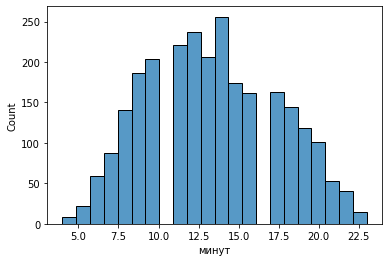

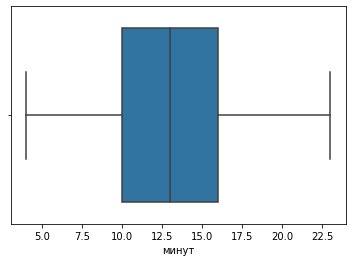

In [84]:
sns.histplot(x=market_time['минут'])
plt.show()
sns.boxplot(x=market_time['минут'])
plt.show()

С данными датасета `market_time` все в порядке

### Исследовательский анализ датасета `money`

In [85]:
money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


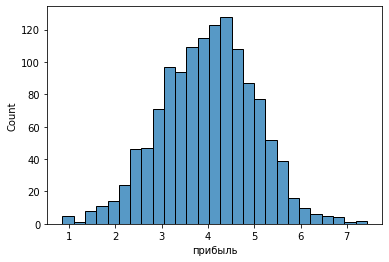

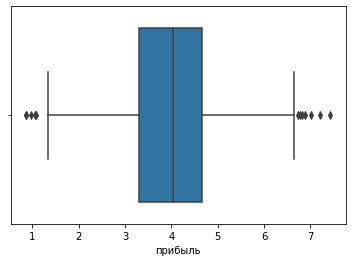

In [86]:
sns.histplot(x=money['прибыль'])
plt.show()
sns.boxplot(x=money['прибыль'])
plt.show()

In [87]:
money[(money['прибыль'] < 3.3) | (money['прибыль'] > 4.67)].count()

id         648
прибыль    648
dtype: int64

Значений выходящих за 1 и 3 квантиль слишком много, очистить их не получится, но больших выбросов не наблюдается, продолжаем

### Отберем клиентов с покупательской активностью не менее трёх месяцев

Чтобы отобрать клиентов с покупательской активностью не менне трех месяцев, нужно обратиться к датасету `market_money`, и выделить только те `id`, `выручка` которых больше 0 по трем периодам

Возьмем значения `id` из пункта 4.2

In [88]:
market_money = market_money[market_money['id'] != 215348]
market_money = market_money[market_money['id'] != 215357]
market_money = market_money[market_money['id'] != 215359]

In [89]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3890 non-null   int64  
 1   период   3890 non-null   object 
 2   выручка  3890 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


**Вывод**

Проведен исследовательский анализ

Оценив гистограммы и ящики с усами количественных признаков, можем сказать следующее:

- В основном с данными все в порадяке
- Есть небольшое количество выбросов в некоторых столбцах, нужно будет посмотреть на их влияние при создании МО, и очистить если оно слишком сильное
- маркет_актив_тек_мес имеет всего 3 значения

Проанализировав категориальные признаки с помощью круговых диаграмм и barplot, было определно, какие категории преобладают в том или ином столбце.

Были обнаржены выбросы в датафрейме `market_money`, столбце ['выручка'], и удалены.

Так же были отобраны клиенты с покупательской активностью не менне трех месяцев, путем обращения к датасету `market_money`, и выделению только те `id`,  значения `выручка` которых больше 0 по трем периодам.

Данные очищены, и проанализированны, можем приступать к объединению таблиц

## Объединение таблиц

Чтобы объединить таблицы, сначала нужно сделать столбец с `id` индексами строк, так как при МО он не понадобится, а также стоит разделить данные таблиц `market_money` и `market_time` по периодам. 

In [90]:
market_file = market_file.set_index('id')
market_money = market_money.set_index('id')
market_time = market_time.set_index('id')

In [91]:
display(market_file.head(),
        market_money.head(),
        market_time.head()
       )

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,период,выручка
id,,
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6
215349,предыдущий_месяц,5216.0
215350,препредыдущий_месяц,4826.0
215350,текущий_месяц,5058.4


,период,минут
id,,
215348,текущий_месяц,14
215348,предыдущий_месяц,13
215349,текущий_месяц,10
215349,предыдущий_месяц,12
215350,текущий_месяц,13


In [92]:
# разделим датасет market_money
current_month_money = market_money[market_money['период'] == 'текущий_месяц']
current_month_money = current_month_money.rename(columns={
    'период': 'текущий_месяц',
    'выручка': 'текущ_выручка'
})
previous_month_money = market_money[market_money['период'] == 'предыдущий_месяц']
previous_month_money = previous_month_money.rename(columns={
    'период': 'предыдущий_месяц',
    'выручка': 'предыдущ_выручка'
})
preprevious_month_money = market_money[market_money['период'] == 'препредыдущий_месяц']
preprevious_month_money = preprevious_month_money.rename(columns={
    'период': 'препредыдущий_месяц',
    'выручка': 'препредыдущ_выручка'
})
display(
    current_month_money.head(),
    previous_month_money.head(),
    preprevious_month_money.head(),
    market_money['период'].count(),
    current_month_money['текущий_месяц'].count(),
    previous_month_money['предыдущий_месяц'].count(),
    preprevious_month_money['препредыдущий_месяц'].count()
       )

,текущий_месяц,текущ_выручка
id,,
215349,текущий_месяц,4971.6
215350,текущий_месяц,5058.4
215351,текущий_месяц,6610.4
215352,текущий_месяц,5872.5
215353,текущий_месяц,5388.5


,предыдущий_месяц,предыдущ_выручка
id,,
215349,предыдущий_месяц,5216.0
215350,предыдущий_месяц,5457.5
215351,предыдущий_месяц,6158.0
215352,предыдущий_месяц,5807.5
215353,предыдущий_месяц,4738.5


,препредыдущий_месяц,препредыдущ_выручка
id,,
215349,препредыдущий_месяц,4472.0
215350,препредыдущий_месяц,4826.0
215351,препредыдущий_месяц,4793.0
215352,препредыдущий_месяц,4594.0
215353,препредыдущий_месяц,5124.0


3890

1296

1297

1297

In [93]:
all_period_money = current_month_money.join(previous_month_money, how='inner')

In [94]:
all_period_money = all_period_money.join(preprevious_month_money, how='inner')

In [95]:
all_period_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   текущий_месяц        1296 non-null   object 
 1   текущ_выручка        1296 non-null   float64
 2   предыдущий_месяц     1296 non-null   object 
 3   предыдущ_выручка     1296 non-null   float64
 4   препредыдущий_месяц  1296 non-null   object 
 5   препредыдущ_выручка  1296 non-null   float64
dtypes: float64(3), object(3)
memory usage: 70.9+ KB


In [96]:
# разделим датасет market_time
current_month_time = market_time[market_time['период'] == 'текущий_месяц']
current_month_time = current_month_time.rename(columns={
    'период': 'текущий_месяц',
    'минут': 'текущ_минут'
})
previous_month_time = market_time[market_time['период'] == 'предыдущий_месяц']
previous_month_time = previous_month_time.rename(columns={
    'период': 'предыдущий_месяц',
    'минут': 'предыдущ_минут'
})
display(
    current_month_time.head(),
    previous_month_time.head(),
    market_time['период'].count(),
    current_month_time['текущий_месяц'].count(),
    previous_month_time['предыдущий_месяц'].count()
       )

,текущий_месяц,текущ_минут
id,,
215348,текущий_месяц,14
215349,текущий_месяц,10
215350,текущий_месяц,13
215351,текущий_месяц,13
215352,текущий_месяц,11


,предыдущий_месяц,предыдущ_минут
id,,
215348,предыдущий_месяц,13
215349,предыдущий_месяц,12
215350,предыдущий_месяц,8
215351,предыдущий_месяц,11
215352,предыдущий_месяц,8


2600

1300

1300

In [97]:
all_period_time = current_month_time.join(previous_month_time, how='inner')

In [98]:
all_period_time = all_period_time.drop(columns=['текущий_месяц', 'предыдущий_месяц'])

In [99]:
all_period_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   текущ_минут     1300 non-null   int64
 1   предыдущ_минут  1300 non-null   int64
dtypes: int64(2)
memory usage: 62.8 KB


In [100]:
market_full = market_file.join(all_period_money, how='inner')

In [101]:
market_full = market_full.join(all_period_time, how='inner')

In [102]:
market_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

In [103]:
market_full.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,текущий_месяц,текущ_выручка,предыдущий_месяц,предыдущ_выручка,препредыдущий_месяц,препредыдущ_выручка,текущ_минут,предыдущ_минут
id,,,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,текущий_месяц,4971.6,предыдущий_месяц,5216.0,препредыдущий_месяц,4472.0,10,12
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,текущий_месяц,5058.4,предыдущий_месяц,5457.5,препредыдущий_месяц,4826.0,13,8
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,текущий_месяц,6610.4,предыдущий_месяц,6158.0,препредыдущий_месяц,4793.0,13,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,текущий_месяц,5872.5,предыдущий_месяц,5807.5,препредыдущий_месяц,4594.0,11,8
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,текущий_месяц,5388.5,предыдущий_месяц,4738.5,препредыдущий_месяц,5124.0,10,10


**Вывод**

Чтобы объединить таблицы, сначала нужно сделать столбец с `id` индексами строк, так как при МО он не понадобится, а также стоит разделить данные таблиц `market_money` и `market_time` по периодам.

После разделения столбцов период все данные были собраны в один датафрейм `market_full`, методом `join`, со значением `how='inner'`.

## Корреляционный анализ

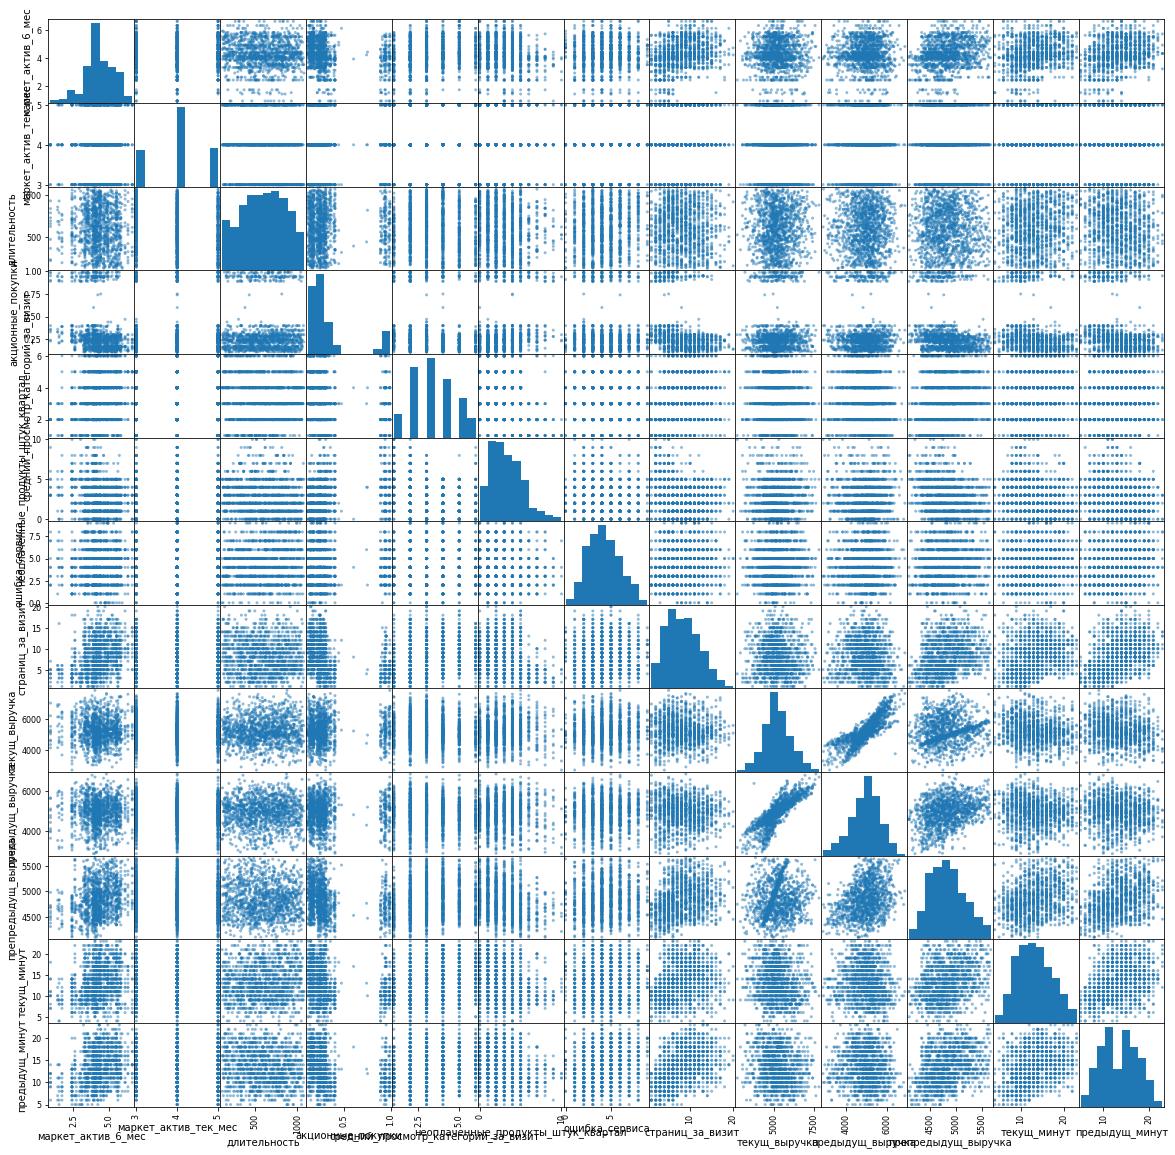

In [104]:
# посмтроим матрицу диаграмм рассеяния для количественных признаков
pd.plotting.scatter_matrix(market_full, figsize=(20, 20)); 

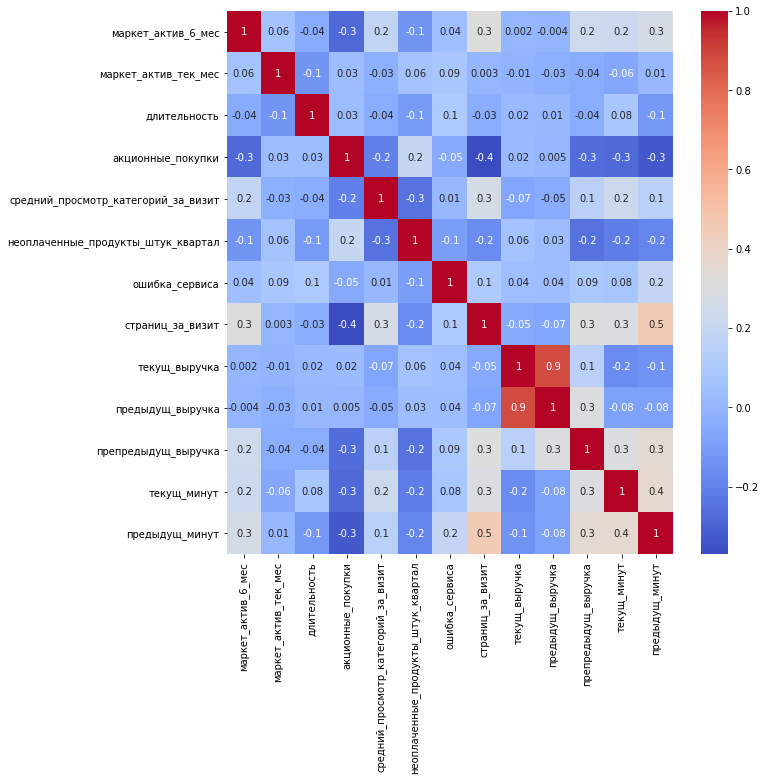

In [105]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(market_full.corr(method='spearman'), annot = True, fmt='.1g', cmap='coolwarm')
plt.show()

Мультиколлинеарность имеется между признаками текущей и предыдущей выручки, так как их коэффициент корреляции 0.9, для ее устранения, удалим столбцы с данными признаками

In [106]:
market_full_not_multi = market_full.drop(columns=['текущ_выручка', 'предыдущ_выручка'], axis=1)

In [107]:
market_full_not_multi.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,препредыдущ_выручка,текущ_минут,предыдущ_минут
id,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4472.0,10,12
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4826.0,13,8
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4793.0,13,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4594.0,11,8
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,5124.0,10,10


In [108]:
market_full_not_multi['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [109]:
market_full_not_multi['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Кухонная посуда', 'Техника для красоты и здоровья',
       'Мелкая бытовая техника и электроника'], dtype=object)

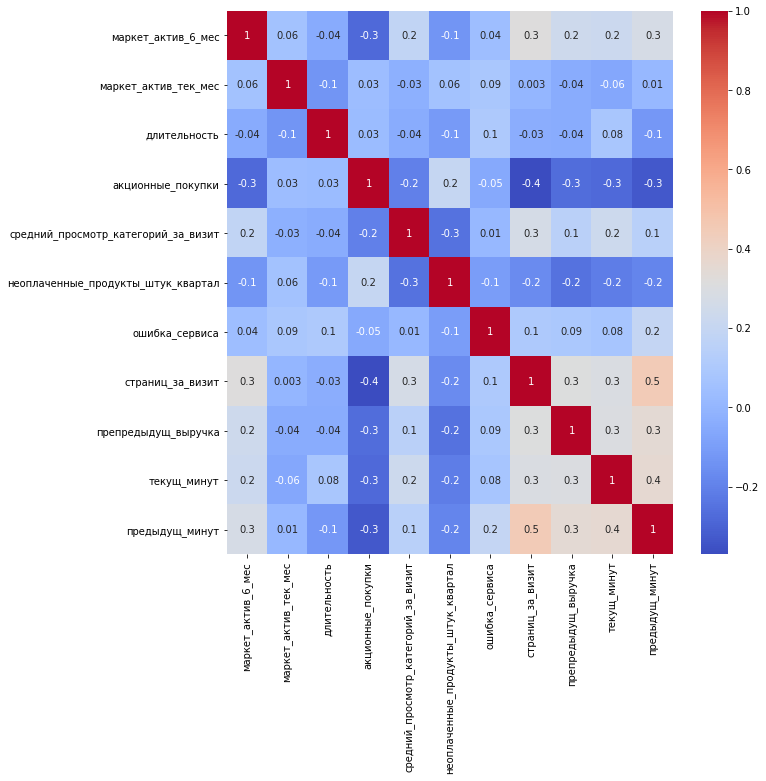

In [110]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(market_full_not_multi.corr(method='spearman'), annot = True, fmt='.1g', cmap='coolwarm')
plt.show()

Мультиколлинеарность устранена, можно присутмать к созданию МО

**Вывод**

Проведен корреляционный анализ.

С помощью построения матрицы диаграмм рассеяния были визуально обнаружены признаки с высоким значением коэффциента корреляции.

Для уточнения значений, построена тепловая карта по корреляционной матрице с методом корреляции Спирмена, так как данные не имеют вида нормального распределения. Тепловая карта помогла уточнить признаки с высокой корреляие, это `'текущ_выручка', 'предыдущ_выручка'`, они были удалены, для того чтобы исбежать мультиколлинерности.

## Использование пайплайнов

Целевым признаком является `покупательская активность`, далее нужно будет разделить признаки на количественные и категориальные, учесть что пропусков в данных у нас нет и составить пайпалйн, который по разному будет кодировать категориальные и количественные признаки для различных типов моделей

In [111]:
market_not_index = market_full_not_multi.reset_index(drop=True)
market_not_index.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,препредыдущ_выручка,текущ_минут,предыдущ_минут
0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4472.0,10,12
1,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4826.0,13,8
2,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4793.0,13,11
3,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4594.0,11,8
4,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,5124.0,10,10


In [112]:
le_col = market_not_index.drop(columns=[
    'тип_сервиса', 
    'разрешить_сообщать',
    'текущий_месяц',
    'предыдущий_месяц',
    'препредыдущий_месяц',
    'популярная_категория',
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'препредыдущ_выручка',
    'текущ_минут',
    'предыдущ_минут'    
])
le_col = pd.DataFrame(le_col, columns=['покупательская_активность'])
le_col.head()

,покупательская_активность
0,Снизилась
1,Снизилась
2,Снизилась
3,Снизилась
4,Снизилась


In [113]:
le = LabelEncoder()
le_df = le.fit_transform(le_col['покупательская_активность'])
le_df = pd.DataFrame(le_df, columns=['покупательская_активность_le'])

In [114]:
market_full_not_multi_le = pd.concat([market_not_index, le_df], axis=1)
market_full_not_multi_le = market_full_not_multi_le.drop(columns=['покупательская_активность'])
market_full_not_multi_le.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,препредыдущ_выручка,текущ_минут,предыдущ_минут,покупательская_активность_le
0,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4472.0,10,12,1
1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4826.0,13,8,1
2,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4793.0,13,11,1
3,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4594.0,11,8,1
4,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,5124.0,10,10,1


In [115]:
market_full_not_multi['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [116]:
market_full_not_multi['покупательская_активность'].value_counts()

Прежний уровень    802
Снизилась          494
Name: покупательская_активность, dtype: int64

Знчений с `Прежний уровень` практически в 2 раза больше чем значений с `Снизилась`, будем использовать метрику `roc_auc_score`, так как данную метрику можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другими

In [117]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    market_full_not_multi_le.drop(columns=['покупательская_активность_le'], axis=1),
    market_full_not_multi_le['покупательская_активность_le'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_full_not_multi_le['покупательская_активность_le'])

In [119]:
# создадим списки с категориальными значениями
ohe_columns = [
    'тип_сервиса', 
    'разрешить_сообщать',
    'текущий_месяц',
    'предыдущий_месяц',
    'препредыдущий_месяц'
    # 'популярная_категория'
]
ord_columns = [
    'популярная_категория' 
]
# создадим список с количественными значениями
num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'препредыдущ_выручка',
    'текущ_минут',
    'предыдущ_минут'
]

In [121]:
# Добавляем OHE-кодирование в пайплайн

ohe_pipe = Pipeline(
    [
     ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]
    )

In [122]:
# Добавляем Ordinal-кодирование в пайплайн
ord_pipe = Pipeline(
    [
        ('ord',  OrdinalEncoder(
            handle_unknown = 'use_encoded_value',
            unknown_value = np.nan
     ))
    ]
)

In [123]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [124]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [125]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            # liblinear
            penalty='l1',
            solver='liblinear'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC()],
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        # 'models__C': range(0, 10),
        # 'models__gamma': range(0,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'текущий_месяц',
                                                   'предыдущий_месяц',
                                                   'препредыдущий_месяц']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                               

In [130]:
y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:,1])}')

Метрика ROC-AUC на тестовой выборке: 0.9153824374064636


Лучшей моделью стала `LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')` с заданными параметрами, ее метрика `roc_auc_score = 0.8965` на тренировочной выборки, на тестовой составила 0.9154

**Вывод**

Был создан пайплайн, количественные и категориальные признаки в котором обрабатываются раздельно. Для кодирования категориальных признаков использовалось два кодировщика `OneHotEncoder, OrdinalEncoder`, для масштабирования количественных — `StandardScaler, MinMaxScaler, RobustScaler, 'passthrough'`. Обучены четыре модели: `KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()`. Для каждой из них были подобраны несколько гиперпараметров. 

Метрика, для оценки качества моделей была выбрана ROC-AUC, так как данную метрику можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другим.

После инициализирования всех моеделей пайплайном, была выбрана лучшаяя: `LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')` с заданными параметрами, ее метрика `roc_auc_score = 0.8965` на тренировочной выборки, на тестовой составила 0.9154

## Анализ важности признаков

Создадим лучшую модель из пайплайна и проверим ее метрики, чтобы все совпало, после чего омжно провести анализ SHAP

In [91]:
encoder = OneHotEncoder(handle_unknown='error', drop='first', sparse=False)

# обучаем и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[ohe_columns])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[ohe_columns])

# получаем от кодировщика список новых столбцов и сохраняем его в новой переменной 
encoder_col_names = encoder.get_feature_names()

In [92]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [93]:
ordcoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan)

X_train_ord = ordcoder.fit_transform(X_train[ord_columns])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ord = ordcoder.transform(X_test[ord_columns])

# получаем от кодировщика список новых столбцов и сохраняем его в новой переменной 
# ordcoder_col_names = ordcoder.get_feature_names()

scaler = RobustScaler()

# обучаем и трансформируем категориальные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_columns])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_columns])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных


X_train_ord = pd.DataFrame(X_train_ord, columns=['ord'])
X_test_ord = pd.DataFrame(X_test_ord, columns=['ord'])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train = pd.concat([X_train_ohe, X_train_ord, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_ord, X_test_scaled], axis=1)

model = LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')

In [94]:
predictions = model.predict_proba(X_test)

In [95]:
auc = roc_auc_score(y_test, predictions[:,1])
auc

0.9153419892407879

Метрика совпала, проводим анализ SHAP

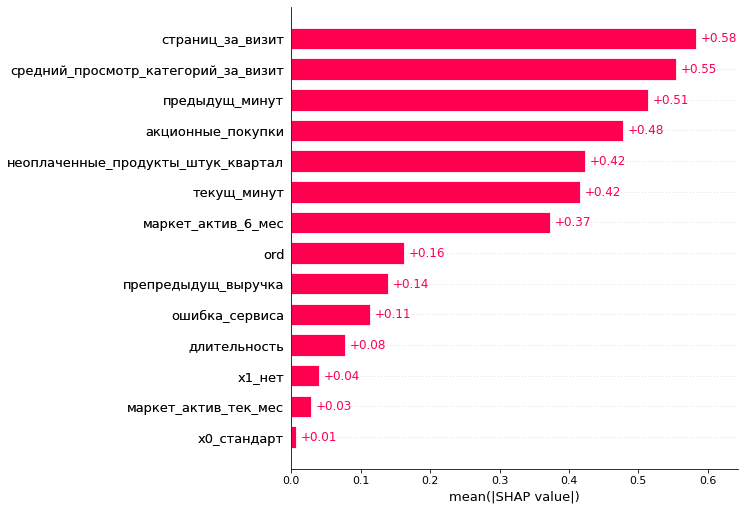

In [96]:
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=17)

На предсказания модели сильнее всего влияют признаки `предыдущ_минут`, `страниц_за_визит`, `средний_просмотр_категорий_за_визи`, `текущ_минут`, самое незначительное влияние оказывают признаки `x1_нет` и `маркет_актив_тек_мес`.

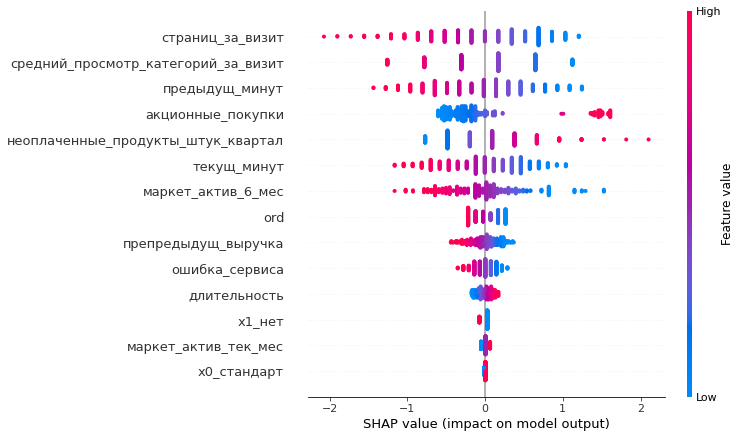

In [97]:
shap.plots.beeswarm(shap_values, max_display=16)

Модель оценивает принадлежность к признаку 0 (Прежний уровень покупательской активности), сильнее всего по таким признакам как:
- `предыдущ_минут`;
- `страниц_за визит`;
- `средний_просмотр_категорий_за_визит`;
- `текущ_минут`.

Принадлежность к признаку 1 (Покупательская активность снизилась):
- `акционные_покупки`;
- `неоплаченные_продукты_штук_квартал`.

Соотвественно, чтобы поддерживать покупательскую способность на прежнем уровне, компании необходимо повысить удержание клиента в приложении, возможно предлагать ему похожие товары по выгодной цене, или каким-то образом повысить привлекательность карточек товара, разбиение на более четкие категории тоже могло бы помочь.

Так же можно снизить количество акций, либо ограничить количество покупок по ним, и ввести какой-ниудь штраф за неоплаченные продукты, при их возврате на склад (как это делает wildberries).

**Вывод**

На предсказания модели сильнее всего влияют признаки `предыдущ_минут`, `страниц_за_визит`, `средний_просмотр_категорий_за_визи`, `текущ_минут`, самое незначительное влияние оказывают признаки `x1_нет` и `маркет_актив_тек_мес`.

Модель оценивает принадлежность к признаку 0 (Прежний уровень покупательской активности), сильнее всего по таким признакам как:
- `предыдущ_минут`;
- `страниц_за визит`;
- `средний_просмотр_категорий_за_визит`;
- `текущ_минут`.

Принадлежность к признаку 1 (Покупательская активность снизилась):
- `акционные_покупки`;
- `неоплаченные_продукты_штук_квартал`.

Соотвественно, чтобы поддерживать покупательскую способность на прежнем уровне, компании необходимо повысить удержание клиента в приложении, возможно предлагать ему похожие товары по выгодной цене, или каким-то образом повысить привлекательность карточек товара, разбиение на более четкие категории тоже могло бы помочь.

Так же можно снизить количество акций, либо ограничить количество покупок по ним, и ввести какой-ниудь штраф за неоплаченные продукты, при их возврате на склад (как это делает wildberries).

## Сегментация покупателей

Выделем сегмент покупателей, у которых снизилась покупательская активность, при этом высокое значение аукционных покупок, низкое удержание на сайте и много неоплаченных продуктов 

In [108]:
market_full_not_multi_le.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,препредыдущ_выручка,текущ_минут,предыдущ_минут,покупательская_активность_le
0,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4472.0,10,12,1
1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4826.0,13,8,1
2,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4793.0,13,11,1
3,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,4594.0,11,8,1
4,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,текущий_месяц,предыдущий_месяц,препредыдущий_месяц,5124.0,10,10,1


In [110]:
market_down = market_full_not_multi_le[market_full_not_multi_le['покупательская_активность_le'] == 1]

In [111]:
market_down.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 589
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          494 non-null    object 
 1   разрешить_сообщать                   494 non-null    object 
 2   маркет_актив_6_мес                   494 non-null    float64
 3   маркет_актив_тек_мес                 494 non-null    int64  
 4   длительность                         494 non-null    int64  
 5   акционные_покупки                    494 non-null    float64
 6   популярная_категория                 494 non-null    object 
 7   средний_просмотр_категорий_за_визит  494 non-null    int64  
 8   неоплаченные_продукты_штук_квартал   494 non-null    int64  
 9   ошибка_сервиса                       494 non-null    int64  
 10  страниц_за_визит                     494 non-null    int64  
 11  текущий_месяц                   

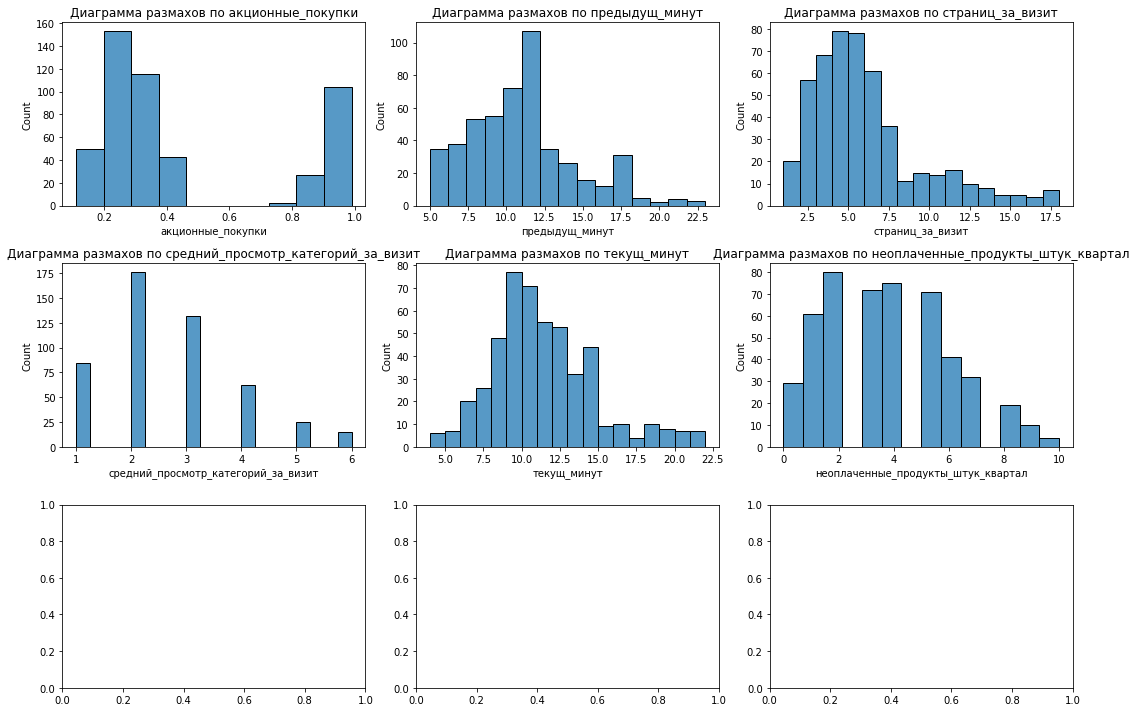

In [112]:
ht_func_col(market_down, ['акционные_покупки', 'предыдущ_минут', 'страниц_за_визит', 'средний_просмотр_категорий_за_визит', 'текущ_минут', 'неоплаченные_продукты_штук_квартал'])

In [113]:
market_down = market_down[market_down['акционные_покупки'] > 0.6]

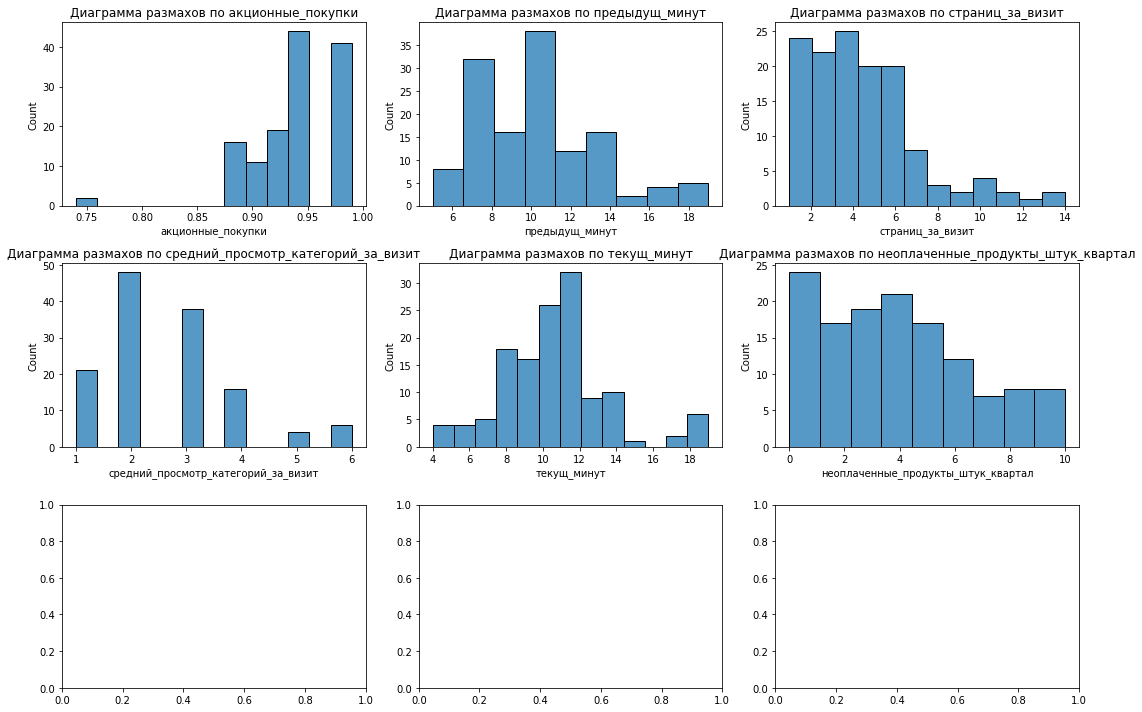

In [114]:
ht_func_col(market_down, ['акционные_покупки', 'предыдущ_минут', 'страниц_за_визит', 'средний_просмотр_категорий_за_визит', 'текущ_минут', 'неоплаченные_продукты_штук_квартал'])

In [115]:
market_down[['акционные_покупки', 'предыдущ_минут', 'страниц_за_визит', 'средний_просмотр_категорий_за_визит', 'текущ_минут', 'неоплаченные_продукты_штук_квартал']].describe()

,акционные_покупки,предыдущ_минут,страниц_за_визит,средний_просмотр_категорий_за_визит,текущ_минут,неоплаченные_продукты_штук_квартал
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.941203,10.398496,4.736842,2.639098,10.556391,4.007519
std,0.041158,2.928284,2.489051,1.232996,2.919147,2.512081
min,0.740000,5.000000,1.000000,1.000000,4.000000,0.000000
25%,0.930000,8.000000,3.000000,2.000000,9.000000,2.000000
50%,0.940000,10.000000,4.000000,2.000000,10.000000,4.000000
75%,0.980000,12.000000,6.000000,3.000000,12.000000,6.000000
max,0.990000,19.000000,14.000000,6.000000,19.000000,10.000000


In [116]:
market_down_max = market_down[market_down['акционные_покупки'] > 0.95]

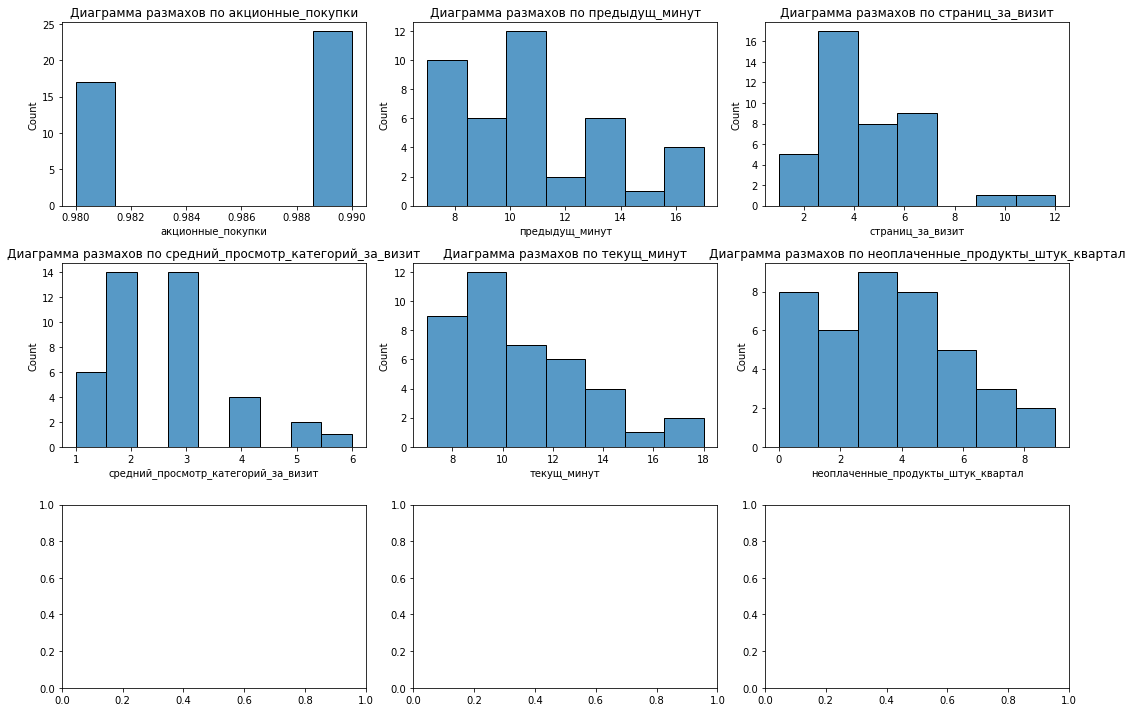

In [117]:
ht_func_col(market_down_max, ['акционные_покупки', 'предыдущ_минут', 'страниц_за_визит', 'средний_просмотр_категорий_за_визит', 'текущ_минут', 'неоплаченные_продукты_штук_квартал'])

Как мы можем заметить, данные хорошо коррелируют, как и предполгалась, чем больше аукционных покупок, тем меньше удержание на сайте, однако неоплаченных покупок больше не становится.

Основной рекомендацией будет ограничение по акционным покупкам, возможно предлагать их меньше, если их колчество превышает какой-то определенный уровень (например 0.6, на этом пороге совсем нет значений в первой гистограмме) или добавить возможность получать акции за счет других, не аукционных покупок. Тогда и удержание вырастет и покупательская активность тоже.

**Вывод**

Выделен сегмент покупателей, у которых снизилась покупательская активность, при этом высокое значение аукционных покупок, низкое удержание на сайте и много неоплаченных продуктов.

Построены гистограммы распределения для выбранных признаков, данные хорошо коррелируют, как и предполгалась, чем больше аукционных покупок, тем меньше удержание на сайте, однако неоплаченных покупок больше не становится.

Основной рекомендацией будет ограничение по акционным покупкам, возможно предлагать их меньше, если их колчество превышает какой-то определенный уровень (например 0.6, на этом пороге совсем нет значений в первой гистограмме) или добавить возможность получать акции за счет других, не аукционных покупок. Тогда и удержание вырастет и покупательская активность тоже.

## Общий вывод

**Шаг 2**

После загрузки данных видим следующую какртину:
-  В датасете `market_file.csv` пропущенных значений не наблюдается, столбцам `Маркет_актив_6_мес` и `Акционные_покупки` присвоен не тот тип, нужно поменять его на `float`, и узнать почему изначально он не такой. Метод discribe не вызвал вопросов, взглянем туда после обработки не верных столбцов.
-  В датасете `market_money.csv` пропущенных значений не наблюдается, столбцу `Выручка` присвоен не тот тип, нужно поменять его на `float`, и узнать почему изначально он не такой. Метод discribe пока бесполезен, взглянем туда после обработки не верных столбцов.
- В датасете `market_time` проблем не наблюдается.
- В датасете `money` проблем нет, нужно уточнить в чем измеряется прибыль, иначе значение слишком маленькие.

В общем нулевых значений нет, небольшие проблемы с типами данных, все это пофиксим, а так же возможны дубликаты, с ними тоже разберемся. Стоит так же переименовать столбцы, привести их к змеиному регистру. Можно приступать к предобработке.

**Шаг 3**

Была создана функция для переименования столбцов, и применена ко всем датафреймам. Исправлены типы данных некоторых столбцов. Так же устрнены ошибки в названиях значений столбцов, и выполнена проверка на дубликаты, дубликатов не обнаружено.

**Шаг 4**

Проведен исследовательский анализ

Оценив гистограммы и ящики с усами количественных признаков, можем сказать следующее:

- В основном с данными все в порадяке
- Есть небольшое количество выбросов в некоторых столбцах, нужно будет посмотреть на их влияние при создании МО, и очистить если оно слишком сильное
- маркет_актив_тек_мес имеет всего 3 значения

Проанализировав категориальные признаки с помощью круговых диаграмм и barplot, было определно, какие категории преобладают в том или ином столбце.

Были обнаржены выбросы в датафрейме `market_money`, столбце ['выручка'], и удалены.

Так же были отобраны клиенты с покупательской активностью не менне трех месяцев, путем обращения к датасету `market_money`, и выделению только те `id`,  значения `выручка` которых больше 0 по трем периодам.

**Шаг 5**

Чтобы объединить таблицы, сначала нужно сделать столбец с `id` индексами строк, так как при МО он не понадобится, а также стоит разделить данные таблиц `market_money` и `market_time` по периодам.

После разделения столбцов период все данные были собраны в один датафрейм `market_full`, методом `join`, со значением `how='inner'`.

**Шаг 6**

Проведен корреляционный анализ.

С помощью построения матрицы диаграмм рассеяния были визуально обнаружены признаки с высоким значением коэффциента корреляции.

Для уточнения значений, построена тепловая карта по корреляционной матрице с методом корреляции Спирмена, так как данные не имеют вида нормального распределения. Тепловая карта помогла уточнить признаки с высокой корреляие, это `'текущ_выручка', 'предыдущ_выручка'`, они были удалены, для того чтобы исбежать мультиколлинерности.

**Шаг 7**

Был создан пайплайн, количественные и категориальные признаки в котором обрабатываются раздельно. Для кодирования категориальных признаков использовалось два кодировщика `OneHotEncoder, OrdinalEncoder`, для масштабирования количественных — `StandardScaler, MinMaxScaler, RobustScaler, 'passthrough'`. Обучены четыре модели: `KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()`. Для каждой из них были подобраны несколько гиперпараметров. 

Метрика, для оценки качества моделей была выбрана ROC-AUC, так как данную метрику можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другим.

После инициализирования всех моеделей пайплайном, была выбрана лучшаяя: `LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')` с заданными параметрами, ее метрика `roc_auc_score = 0.8965` на тренировочной выборки, на тестовой составила 0.9154

**Шаг 8**

На предсказания модели сильнее всего влияют признаки `предыдущ_минут`, `страниц_за_визит`, `средний_просмотр_категорий_за_визи`, `текущ_минут`, самое незначительное влияние оказывают признаки `x1_нет` и `маркет_актив_тек_мес`.

Модель оценивает принадлежность к признаку 0 (Прежний уровень покупательской активности), сильнее всего по таким признакам как:
- `предыдущ_минут`;
- `страниц_за визит`;
- `средний_просмотр_категорий_за_визит`;
- `текущ_минут`.

Принадлежность к признаку 1 (Покупательская активность снизилась):
- `акционные_покупки`;
- `неоплаченные_продукты_штук_квартал`.

Соотвественно, чтобы поддерживать покупательскую способность на прежнем уровне, компании необходимо повысить удержание клиента в приложении, возможно предлагать ему похожие товары по выгодной цене, или каким-то образом повысить привлекательность карточек товара, разбиение на более четкие категории тоже могло бы помочь.

Так же можно снизить количество акций, либо ограничить количество покупок по ним, и ввести какой-ниудь штраф за неоплаченные продукты, при их возврате на склад (как это делает wildberries).

**Шаг 9**

Выделен сегмент покупателей, у которых снизилась покупательская активность, при этом высокое значение аукционных покупок, низкое удержание на сайте и много неоплаченных продуктов.

Построены гистограммы распределения для выбранных признаков, данные хорошо коррелируют, как и предполгалась, чем больше аукционных покупок, тем меньше удержание на сайте, однако неоплаченных покупок больше не становится.

Основной рекомендацией будет ограничение по акционным покупкам, возможно предлагать их меньше, если их колчество превышает какой-то определенный уровень (например 0.6, на этом пороге совсем нет значений в первой гистограмме) или добавить возможность получать акции за счет других, не аукционных покупок. Тогда и удержание вырастет и покупательская активность тоже.

**Шаг 10**

Подготволен основной вывод.